# 비트마스크(BitMask)
- 비트마스크(BitMask)는 이진수를 사용하는 컴퓨터의 연산 방식을 이용하여, **정수의 이진수 표현을 자료 구조로 쓰는 기법**을 말한다. 

 

- 이진수는 0 또는 1을 이용하므로 하나의 비트(bit)가 표현할 수 있는 경우는 두 가지이다. 

 

- 보통 어떤 비트가 1이면 <u>"켜져 있다"</u>라고 말하며, 0이면 <u>"꺼져 있다"</u>라고 말한다.  


- 비트(bit) 연산을 사용해서 부분 집합을 표현할 수 있다.

# 비트 연산(Bitwise operation)
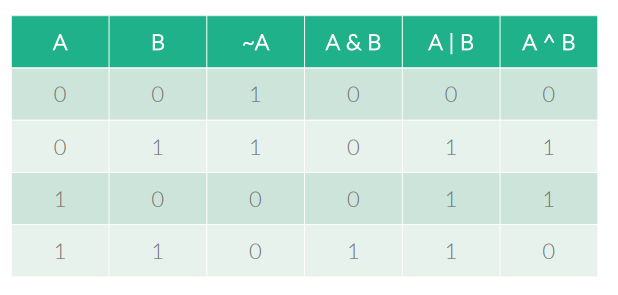

## AND 연산(&)

C = A & B는
A와 B를 가장 뒤의 자리부터 한 bit씩 비교하면서 해당 비트가 **둘 다 켜져있는 경우**에만 C의 해당 비트를 켠다

In [5]:
# A = 27(11011), B = 83(1010011)
A = 27; B = 83
print(A & B, bin(A & B))

19 0b10011


## OR 연산(|)

C = A | B는 A와 B를 가장 뒤의 자리부터 한 bit씩 비교하면서 해당 비트가 **둘 중 하나라도 켜져있는 경우**에만 C의 해당 비트를 켠다

In [6]:
# A = 27(11011), B = 83(1010011)
A = 27; B = 83
print(A | B, bin(A | B))

91 0b1011011


## XOR 연산(^)

C = A ^ B는
A와 B를 가장 뒤의 자리부터 한 bit씩 비교하면서 해당 비트가 **둘 중 하나만 켜져 있는 경우(서로 다른 경우)**에만 C의 해당 비트를 켠다

In [7]:
# A = 27(11011), B = 83(1010011)
A = 27; B = 83
print(A ^ B, bin(A ^ B))

72 0b1001000


## NOT 연산(~)

비트 하나에 적용하는 것으로 **켜져 있는 비트는 끄고, 꺼져 있는 비트는 켠 결과**를 반환한다. NOT 연산의 경우, 자료형에 따라 결과가 달라진다. 또, unsgined, signed에 따라서 보여지는 값은 다르다.    


https://stackoverflow.com/questions/4295578/explanation-of-bitwise-not-operator
https://www.codeit.kr/community/threads/10379
https://blog.naver.com/PostView.nhn?blogId=dlscjs8646&logNo=222087018882

In [44]:
# A = 27(11011)
A = 27
print(~A, bin(~A))

-28 -0b11100


## Shift 연산(<<, >>)
시프트 연산자는 정수 A의 **비트들을 왼쪽 or 오른쪽으로 원하는 만큼 움직인다.** 움직이고 나서 빈자리는 0으로 채워지게 된다.
- A << B는 $A * 2^B$
- A >> B는 $A // 2^B$

In [49]:
# A << B (A를 왼쪽으로 B비트만큼 민다.)
print(1 << 0)
print(1 << 1)
print(1 << 2)
print(1 << 3)
print(1 << 4)
print(3 << 3)
print(5 << 10)

1
2
4
8
16
24
5120


In [50]:
# A >> B (A를 오른쪽으로 B비트만큼 민다.)
print(1 >> 0)
print(1 >> 1)
print(10 >> 1)
print(10 >> 2)
print(10 >> 3)
print(30 >> 1)
print(1024 >> 10)

1
0
5
2
1
15
1


# 비트마스크를 이용한 집합 구현

정수로 집합을 나타낼 수 있다.

집합 A = {1, 3, 4, 5, 9}라면, 집합에는 중복되는 수가 존재하지 않기 때문에 없으면 0, 있으면 1로 표현할 수 있다.\
정수:   0 1 2 3 4 5 6 7 8 9   
존재:   X O X O O O X X X O    
이진수: 0 1 0 1 1 1 0 0 0 1    

즉, 이진수 1000111010으로 십진법 2^9 + 2^5 + 2^4 + 2^3 + 2^1과 같다

- 보통 0부터 N-1까지 정수로 이루어진 집합을 나타낼 때 사용한다.
- 1부터 N까지 정수로 이루어진 집합을 사용하는 건 공간이 2배 더 필요하다.
- 따라서, 0부터 N-1까지로 변형해서 사용하는 것이 더 좋다.

- 전체 집합: (1 << N) -1
- 공집합: 0

# 시간복잡도
검사, 추가, 삭제 모두 O(1)

## 검사
집합 S에 X가 있는지 검사: 해당 비트만 1로 만들어주고 **AND연산**을 사용한다.\
**S & (1 << X)**의 결과가 0이라면 없음, 1 << X(0이 아니면)이면 있음\
**(S >> X) & 1**의 결과가 0인지 1인지로도 X의 여부를 확인할 수 있다.

In [54]:
s = {1, 3, 4, 5, 9} # 570 <- 0b1000111010

# 0이 포함되어 있는지 검사 (570 & 2^0)
print(570 & 1 << 0)
# 1이 포함되어 있는지 검사 (570 & 2^1)
print(570 & 1 << 1)
# 2가 포함되어 있는지 검사 (570 & 2^2)
print(570 & 1 << 2)
# 3이 포함되어 있는지 검사 (570 & 2^3)
print(570 & 1 << 3)

0
2
0
8


## 추가
집합 S에 X를 추가(S의 X번째 비트를 1로 변경): 해당 비트만 1로 만들어주고 **OR연산**을 사용한다.\
**S | (1 << X)** 이미 수가 있는 경우 무시된다.

In [57]:
s = {1, 3, 4, 5, 9} # 570 <- 0b1000111010

# 1 추가하기 (570 | 2^1)
print(570 | 1 << 1)
# 2 추가하기 (570 | 2^2)
print(570 | 1 << 2)
# 3 추가하기 (570 | 2^3)
print(570 | 1 << 3)
# 4 추가하기 (570 | 2^4)
print(570 | 1 << 4)

570
574
570
570


## 삭제
집합 S에서 X를 제거(S의 X번째 비트를 0으로 변경): 해당 비트만 0으로 만들어주고 **AND연산**을 사용한다. \
**S&~(1<<X)** 없는 수를 제거 하려고 하는 경우 무시됨

In [58]:
s = {1, 3, 4, 5, 9} # 570 <- 0b1000111010

# 1 제거하기 (570 | 2^1)
print(570 & ~(1 << 1))
# 2 제거하기 (570 | 2^2)
print(570 & ~(1 << 2))
# 3 제거하기 (570 | 2^3)
print(570 & ~(1 << 3))
# 4 제거하기 (570 | 2^4)
print(570 & ~(1 << 4))

568
570
562
554


## 토글
집합 S에서 X를 0이면 1, 1이면 0으로 토글: 해당 비트만 1로 만들어주고 **XOR**연산을 사용한다. \
**S^(1<<X)**

In [66]:
s = {1, 3, 4, 5, 9} # 570 <- 0b1000111010

# 1 토글하기 (570 ^ 2^1)
print(570 | (1 << 1))
# 2 토글하기 (570 ^ 2^2)
print(570 | (1 << 2))
# 3 토글하기 (570 ^ 2^3)
print(570 | (1 << 3))
# 4 토글하기 (570 ^ 2^4)
print(570 | (1 << 4))

570
574
570
570
